In [2]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
image_path='segment2.png'

In [9]:
imgori=Image.open(image_path)

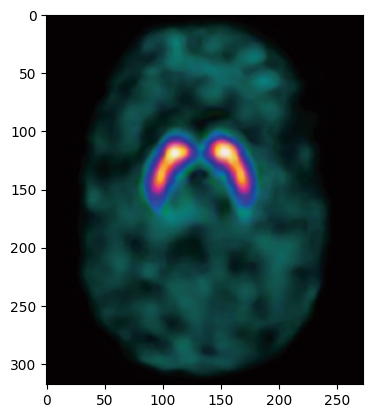

In [10]:
plt.imshow(imgori,cmap='gray')
plt.show()

In [3]:
import heapq
from collections import defaultdict

class HuffmanNode:
    def __init__(self, value, freq):
        self.value = value
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freq_dict):
    heap = [HuffmanNode(value, freq) for value, freq in freq_dict.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right

        heapq.heappush(heap, merged)

    return heap[0]

def build_huffman_codes(node, current_code="", codes=None):
    if codes is None:
        codes = {}

    if node is not None:
        if node.value is not None:
            codes[node.value] = current_code
        build_huffman_codes(node.left, current_code + "0", codes)
        build_huffman_codes(node.right, current_code + "1", codes)

    return codes

def huffman_encode(image_path):
    # Load the image and flatten the pixel values
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    pixels = np.array(image).flatten()

    # Build frequency table
    freq_dict = defaultdict(int)
    for pixel in pixels:
        freq_dict[pixel] += 1

    # Build Huffman tree
    root = build_huffman_tree(freq_dict)

    # Build Huffman codes
    codes = build_huffman_codes(root)

    # Encode the image using Huffman codes
    encoded_data = ''.join(codes[pixel] for pixel in pixels)

    return encoded_data, codes

# Example usage:
image_path = 'segment2.png'
encoded_data, huffman_codes = huffman_encode(image_path)


In [4]:
encoded_data

'111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111101100110011011111111111111111111111111111111111111111111110110011001100110011001100110011001100110011001100110011001100110011001100110010000001100110011001100110011001100110011001100110111111111111111111111111111111111111111111111111110110011011111111111111111111111111111111111111111111111111111111111111111111111111111111011001100110011001100110011001100110011001100110011011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111011001101111111111111101100110111111111111111111111111111111111111110110011001100110011001100100000011001100110011001100110011001100100000011001100110011001100110011001100110

In [5]:
huffman_codes

{16: '0000000',
 99: '000000100000',
 176: '000000100001',
 144: '0000001000100',
 115: '0000001000101',
 127: '000000100011',
 132: '0000001001000',
 167: '0000001001001',
 190: '000000100101',
 131: '0000001001100',
 154: '0000001001101',
 110: '000000100111',
 92: '0000001010',
 141: '0000001011000',
 137: '0000001011001',
 168: '0000001011010',
 207: '0000001011011',
 174: '000000101110',
 108: '000000101111',
 101: '000000110000',
 119: '000000110001',
 100: '000000110010',
 189: '000000110011',
 94: '00000011010',
 239: '00000011011000',
 205: '00000011011001',
 221: '00000011011010',
 148: '00000011011011',
 235: '0000001101110',
 220: '0000001101111',
 88: '000000111',
 51: '000001',
 32: '000010',
 52: '000011',
 42: '000100',
 34: '000101',
 72: '0001100',
 12: '0001101',
 50: '000111',
 80: '00100000',
 79: '00100001',
 17: '0010001',
 49: '001001',
 48: '001010',
 210: '0010110000000',
 121: '0010110000001',
 155: '0010110000010',
 224: '001011000001100',
 226: '00101100000

In [25]:
#compression ratio
import sys
import math
print("size of grayscale input image: "+ str(sys.getsizeof(pixels))+" bytes")
print("size of compressed data image: "+ str(math.ceil(len(encoded_data)/8))+" bytes")
print("compression ratio            : "+ str(sys.getsizeof(pixels)/(math.ceil(len(encoded_data)/8))))

size of grayscale input image: 86942 bytes
size of compressed data image: 58369 bytes
compression ratio            : 1.4895235484589422
